<div style="display: flex; background-color: RGB(255,114,0);" >
<h2 style="margin: auto; padding: 30px; ">Projet de classification de Faux/Vrai Billets</h2>
</div>

<div style="display: flex;" >
<h3 style="margin: auto; padding: 30px; ">CONTEXTE</h3>
<p>L’un des objectifs de la BEAC (Banque des Etats de l’Afrique Centrale) est de mettre en place des méthodes d’identification des contrefaçons des billets en Francs CFA. Dans le cadre de cette lutte, il souhaite mettre en place un algorithme qui soit capable de différencier automatiquement les vrais des faux billets.</p>
</div>

<div style="display: flex;" >
<h3 style="margin: auto; padding: 30px; ">OBJECTIFS</h3>
<p>Lorsqu’un billet arrive, la BEAC a une machine qui consigne l’ensemble de ses caractéristiques géométriques. Au travers des années de lutte, il a observé des différences de dimensions entre les vrais et les faux billets. Ces différences sont difficilement notables à l’œil nu, mais une machine devrait sans problème arriver à les différencier. 
Ainsi, il faudrait construire un algorithme qui, à partir des caractéristiques géométriques d’un billet, serait capable de définir si ce dernier est un vrai ou un faux billet.</p>
</div>

<div style="display: flex;" >
<h3 style="margin: auto; padding: 30px; ">MISSION</h3>
<p>Vous êtes expert data scientist et vous êtes recruté en CDD pour trouver une solution à ce problème en utilisant l’approche d’apprentissage automatique. Le langage de programmation utilisé est Python.</p>
</div>

## PARTIE I : CONNAISSANCE DES DONNEES ET PRETRAITEMENT

In [4]:
#1-importation des librairies néccéssaires pour le projet
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
import pickle

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [5]:
#2-importation des données fournies dans un fichier csv, dans une dataframe pandas
df=pd.read_csv('billets.csv', sep=';')

In [6]:
#3-afficher les premieres lignes des données
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [7]:
#3-afficher les dernières lignes des données
df.tail()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25
1499,False,171.47,104.15,103.82,4.63,3.37,112.07


In [8]:
#4-nombre de ligne et de colone de la dataframe
nombre_ligne, nombre_colone=df.shape
print(f'nombre de ligne de la dataframe: {nombre_ligne} \nnombre colone de la dataframe: {nombre_colone}')

nombre de ligne de la dataframe: 1500 
nombre colone de la dataframe: 7


In [9]:
#5-informations statistiques des variables et interprétation
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


<p><b>Interpretation:</b></p> 
<ul>
   <li> On a 1500 données sur les variables diagonal, height_left, height_right, length, margin_up </li>
   <li> Par contre la variable margin_low en 1463 cela signifie, qu'il possède des valeurs manquantes.</li>
   <li> La diagonale d'un billet varie entre 171.04 et 173.01 avec une valeur moyenne 171.958440, un ecart type de 0.305195. La moitié des billets ont une diagonale de 171.96 </li>
   <li>La height_left varie entre 103.14 et 104.880000 une valeur moyenne de 104.029533, la moitié des billets ont une height_left de 104.029533 </li>
   <li> La longueur des billets varie entre 109.49 et 114.44 avec une moyenne de 112.6785 </li>
</ul>

In [10]:
# 6- Afficher une grève information sur vos donner
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


On remarque la presence des valeurs manquantes sur la colonne <b>margin_low</b>

In [11]:
# 7- Pour voir de près, calculer et afficher le nombre de valeurs manquantes pour chaque colonne
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

On a <b>37 valeurs manquantes</b> sur la colonne <b>margin_low</b>

In [12]:
#8-regression linéaire pour remplacer les valeurs manquantes

# Suppression desdonnées manquantes :
train_df = df.dropna()

#Création d'une dataset comprenant les valeurs manquantes sur la variable margin_low
test_df = df[df["margin_low"].isnull()]

# Creation de X_train et Y_train:
x_train = train_df.drop("margin_low", axis=1)
y_train = train_df["margin_low"]

In [13]:
# Regression lineaire:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_predict = lr_model.predict(test_df.drop("margin_low", axis=1))
y_predict

array([4.06495361, 4.11199026, 4.13400328, 3.99357074, 4.1403993 ,
       4.09428392, 4.07412432, 4.12538999, 4.0807278 , 4.07363322,
       4.11897255, 4.18037978, 4.13648423, 4.05106842, 4.17837685,
       4.22555104, 4.11586845, 4.10284101, 4.08184346, 4.09276238,
       4.11250192, 4.15717623, 4.16028787, 4.12193808, 4.12353555,
       4.19842271, 4.10962313, 4.09696025, 4.13384101, 5.25968515,
       5.264817  , 5.28251853, 5.30206887, 5.20035843, 5.1754678 ,
       5.17345045, 5.24675055])

In [14]:
df.loc[df.margin_low.isnull(), "margin_low"] = y_predict

In [15]:
df.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

<b>On remarque bien que les valeurs manquantes n'existe plus.</b>

## PARTIE II : ANALYSE EXPLOIRATOIRE DES DONNEES

### I-	ANNALYSE UNIVARIEE 

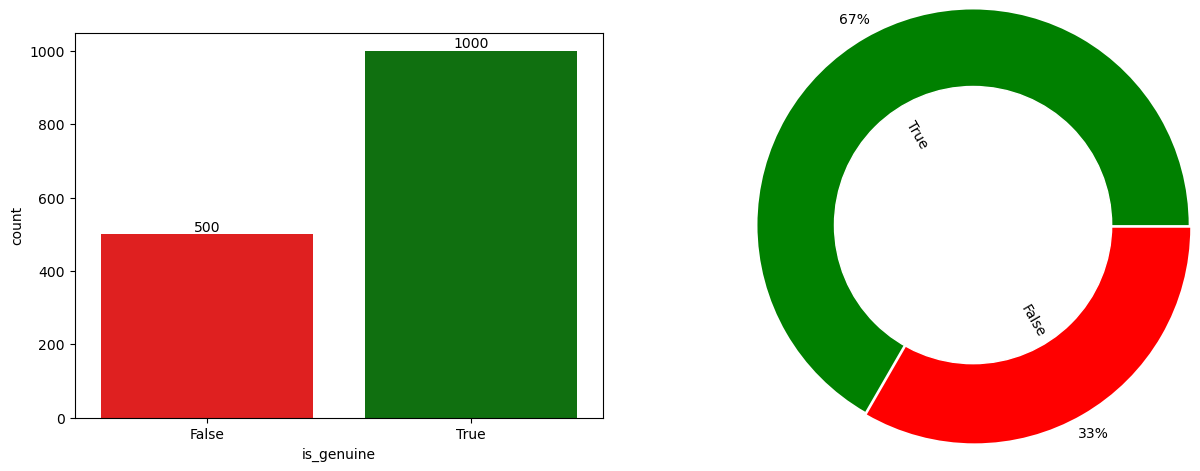

In [16]:
# 1-Représenter l’histogramme du nombre de billet pour chaque type (is_genuine). Commenter le graphique.

target = df[['is_genuine']]
palette = ['red', 'green']
plt.figure(figsize=(15,5))
plt.subplot(121)
ax = sns.countplot(x="is_genuine", data=df, palette = palette)
for container in ax.containers:
    ax.bar_label(container)
    
plt.subplot(122)
df["is_genuine"].value_counts().plot(kind="pie", ylabel='',
                                       autopct='%1.0f%%', radius=1.4,
                                       explode = (0, 0.02),
                                       colors=['green', 'red'],
                                       pctdistance=1.1, labeldistance=0.4,
                                       rotatelabels=True)
circle = plt.Circle( (0,0), 0.9, color='white')
p = plt.gcf()
p.gca().add_artist(circle)

plt.show()

En guise de commentaire: <b>il y'a plus de vrais billets que de faux billet.</b>

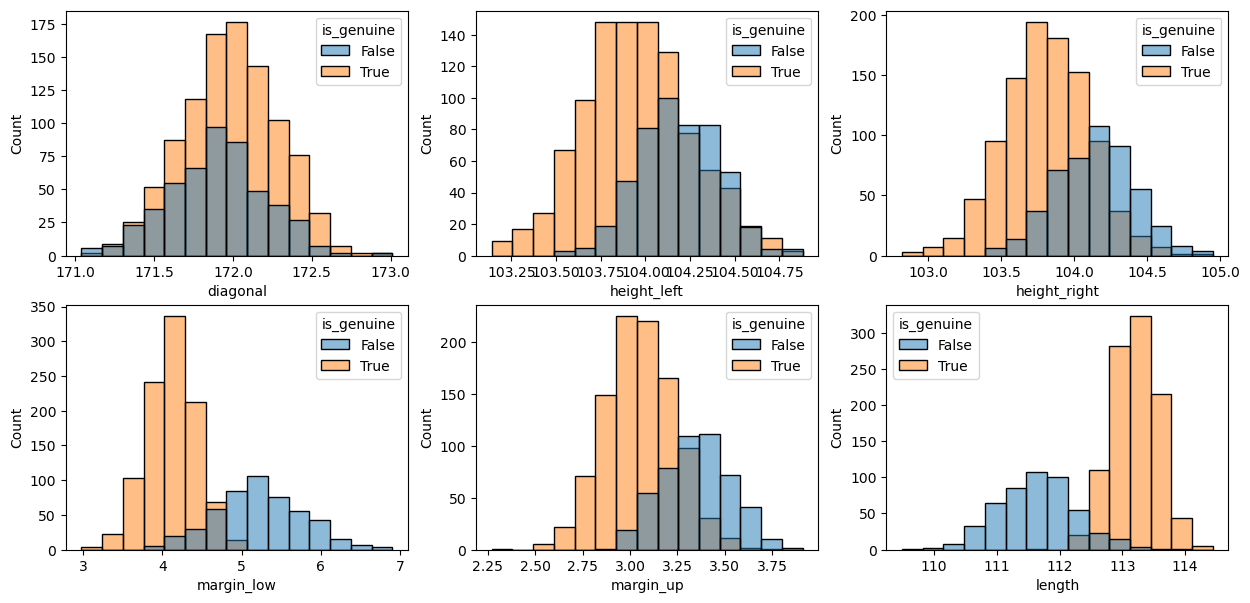

In [17]:
# 2- Représenter les histogrammes de distribution des autres variables. Caractériser graphiquement ces distributions (symétrique ou asymétrique)

columns = [ 'diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

fig,axes = plt.subplots(2,3,figsize=(15,7))
for i in range(len(columns)):
    plt.subplot(2,3,i+1)
    sns.histplot(data = df, x = columns[i], bins=15, hue = 'is_genuine')
plt.show()

<p> Interpretation graphique:</p>
<ul> 
    <li>Les variables height_left, height_right, diagonal, margin_up ont <b>une distribution symétrique</b> </li>
    <li>La variable margin_low a une distribution qui s'étale du coté gauche, <b>elle est asymétrique</b> </li>
    <li>La variable length a une distribution qui s'étale du coté droit, <b>elle est asymétrique</b> </li>
</ul>

### II-	ANNALYSE BIVARIEE 

C:\Users\Micro_W10\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


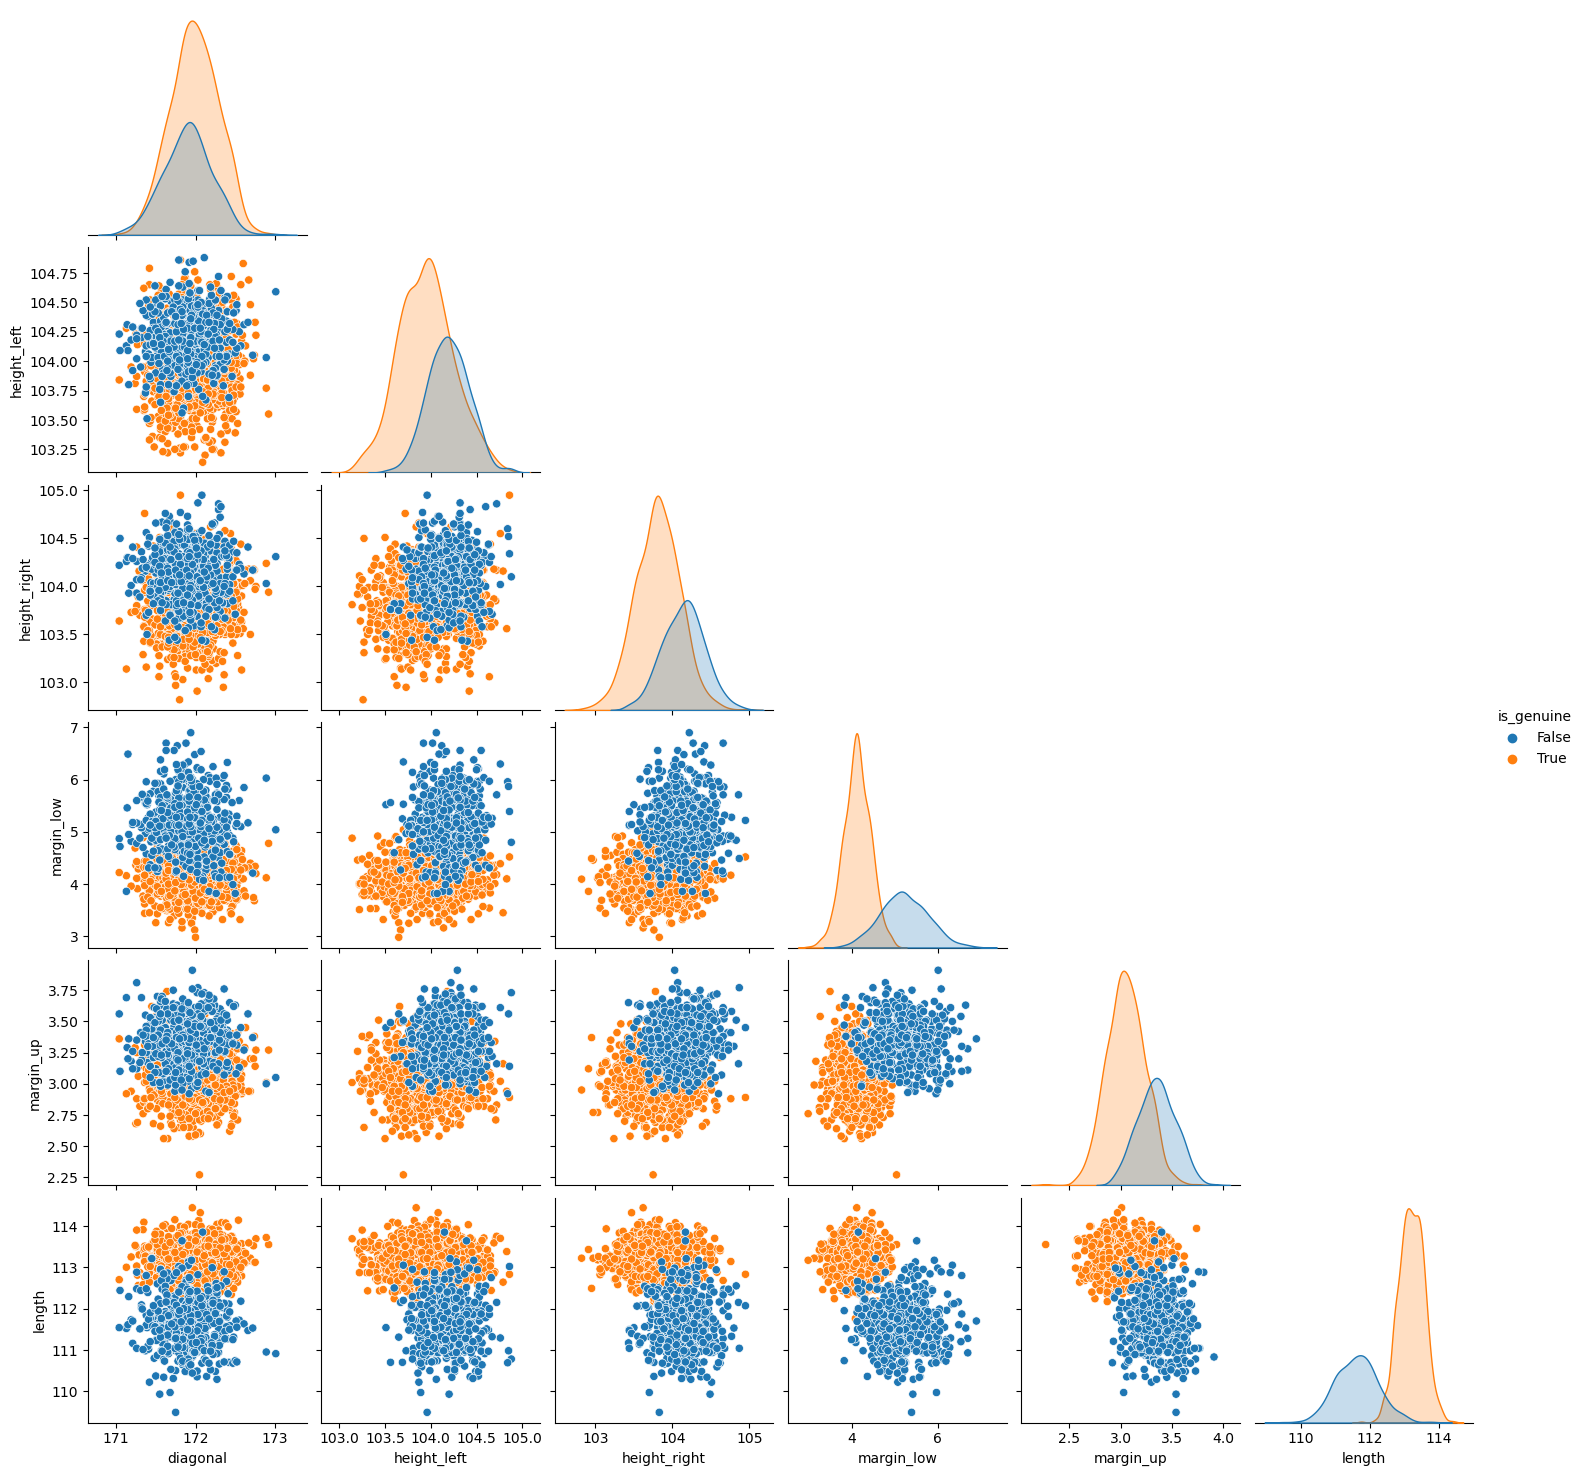

In [18]:
# 1- Représenter les nuages de points pour chaque couple des variables numériques
sns.pairplot(df, hue='is_genuine', corner=True)
plt.show()

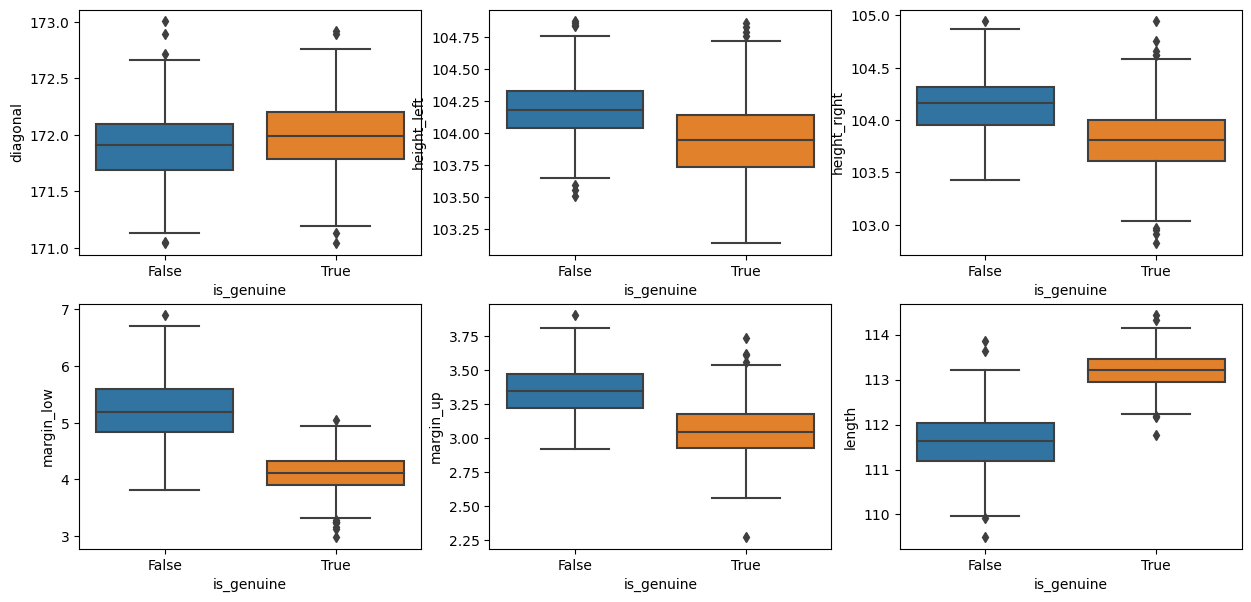

In [19]:
# 2- Représenter la boite à moustache entre le type de billet (is_genuine) et 
# les autres variables numériques (utiliser les couleurs différentes pour chaque type de billet)

fig,axes = plt.subplots(2,3,figsize=(15,7))
for i in range(len(columns)):
    plt.subplot(2,3,i+1)
    sns.boxplot(data = df, y = columns[i], x='is_genuine')
plt.show()

<Figure size 1000x800 with 0 Axes>

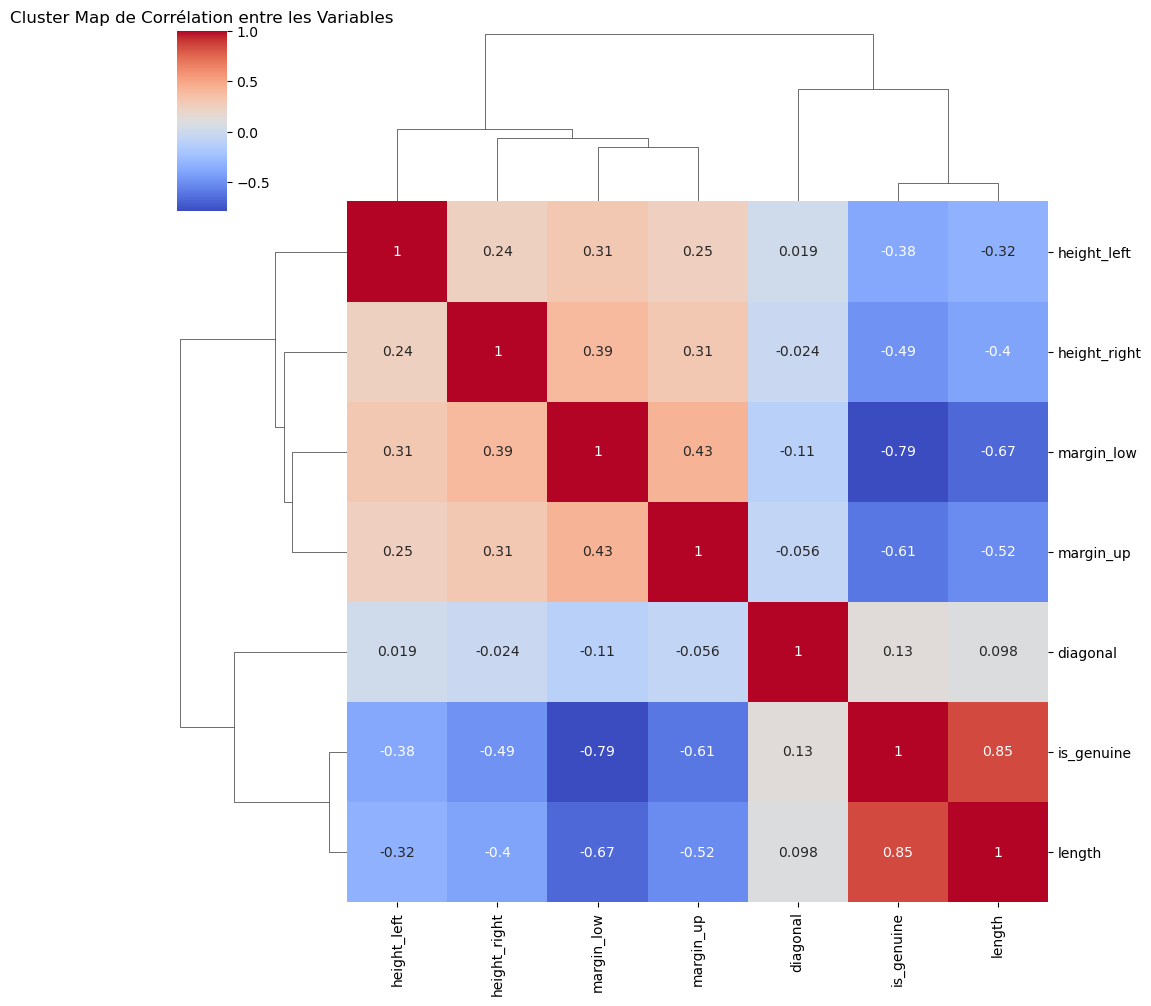

In [20]:
# 3- Afficher le cluster map des corrélations entre les différentes variables. Quel couple de variables est le plus corrélé entre elle ? Donner son coefficient de corrélation

plt.figure(figsize=(10, 8))
sns.clustermap(df.corr(), cmap='coolwarm', annot=True)
plt.title('Cluster Map de Corrélation entre les Variables')
plt.show()


Le couple le plus correle est <b>is_genuine et length</b> avec un coefficient de <b>correlation de 0,85</b>

### III- ANNALYSE MULTIVARIEE 

In [21]:
#4- Faire une réduction a deux composantes principales (PCA) des données

df_ = df.drop(columns=['is_genuine']).values
df_scaled = StandardScaler().fit_transform(df_)

# Instanciation de l'objet PCA avec 2 composantes principales

pca = PCA(n_components = 2)
pca.fit(df_scaled)

PCA(n_components=2)

In [22]:
pcs = pca.components_
print(pcs)

[[-0.0848711   0.33134356  0.39381277  0.50666757  0.43924936 -0.52751096]
 [ 0.94132849  0.30721979  0.10853873 -0.07313776 -0.0043775   0.04865929]]


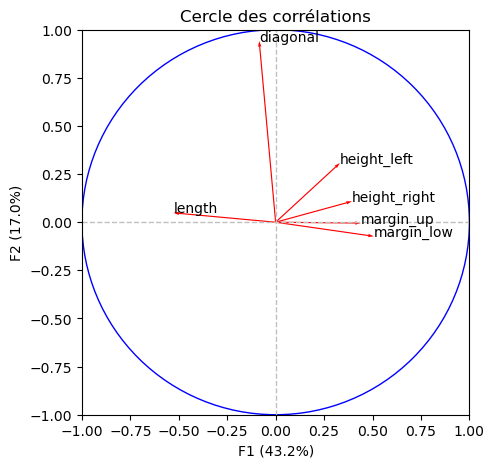

In [23]:
# 5- Tracer le cercle de corrélation et donner une interprétation

fig = plt.subplots(figsize=(5,5))
plt.xlim(-1,1)
plt.ylim(-1,1)

# Tracer les vecteurs
plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
           pcs[0,:], pcs[1,:], angles='xy', scale_units='xy', scale=1, color='r', width= 0.003)

# Etiquetter chaque column avec le nom correspondant
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.text(x, y, df.columns[i+1]) # +1 pour exclude is_genuis

# Tracer du cercle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Ajout des axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

plt.title('Cercle des corrélations')
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))

plt.show()

Interprétation des axes :

PC1 → principalement représentée par les variables « Heigh » (gauche et droite) et « marge » (haut et bas) </br>
PC2 → principalement représenté par les variables « diagonale » et « hauteur » (gauche et droite

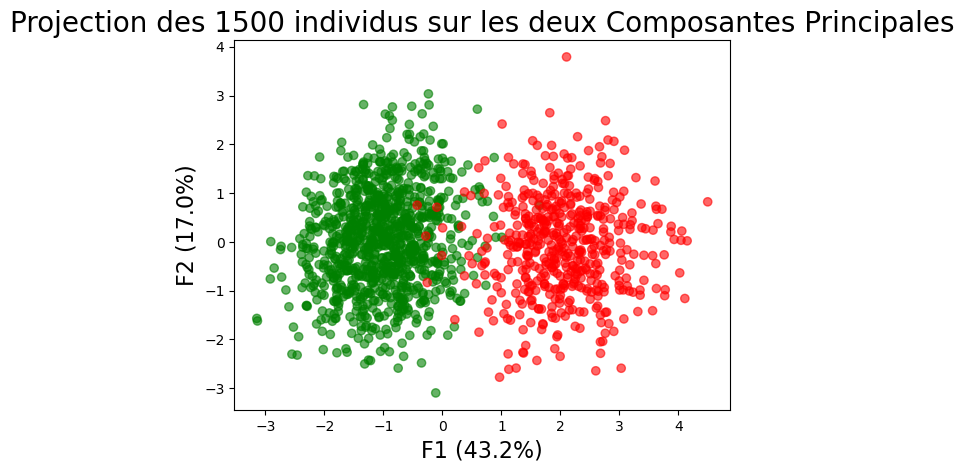

In [24]:
X_projected = pca.transform(df_scaled)

# mapping de couleurs pour  is_genuine
cmap = {True: 'green', False: 'red'}
colors = [cmap[val] for val in df["is_genuine"].values]

plt.scatter(X_projected[:, 0], X_projected[:, 1], c = colors, alpha=0.6)

plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0], 1)), fontsize=16)
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1], 1)), fontsize=16)
plt.title("Projection des {} individus sur les deux Composantes Principales".format(X_projected.shape[0]), fontsize=20)
plt.show()

## PARTIE III : MODELISATION ET OPTIMISATION DU MODELE

### I-	MODELISATION 

In [25]:
#1- Créer les matrice X des données et y des targets (1pts)
X = df.drop(columns=['is_genuine']).values
y = df['is_genuine'].values

In [26]:
#2- Faire une normalisation de type standard des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
#3- Division des données en train et test sets avec 25% des tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
# 4- Entrainer un premier modèle de classification (Régression Logistique) de base avec les hyper paramètres par défaut. (2pts)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
#5- Mesurer les performances de ce modèle. (1pts)

def performance(y_test, y_pred):
    prediction_metrics = [sklearn.metrics.accuracy_score, sklearn.metrics.precision_score, 
                          sklearn.metrics.recall_score, sklearn.metrics.f1_score]
    results = []
    results += [m(y_test, y_pred) for m in prediction_metrics]

    dict_resultats = {
        "accuracy_score":[results[0]],
        "precision_score":[results[1]],
        "recall_score":[results[2]],
        "f1_score":[results[3]]
    }

    return pd.DataFrame.from_dict(dict_resultats)
    

y_pred = model.predict(X_test)
performance(y_test, y_pred)

,accuracy_score,precision_score,recall_score,f1_score
0,0.994667,0.991736,1.0,0.995851


In [30]:
#5- Mesurer les performances de ce modèle. (1pts)
classification_rep = sklearn.metrics.classification_report(y_test, y_pred)
print("Rapport de classification :")
print(classification_rep)

Rapport de classification :
              precision    recall  f1-score   support

       False       1.00      0.99      0.99       135
        True       0.99      1.00      1.00       240

    accuracy                           0.99       375
   macro avg       1.00      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375



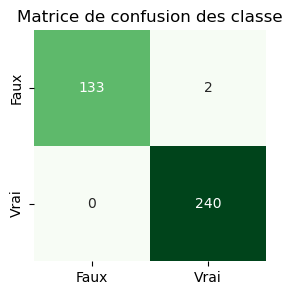

In [31]:
#5- Mesurer les performances de ce modèle. (1pts)
def matrix_confusion(y_test, y_pred):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3,3))
    sns.heatmap(data=cnf_matrix, annot=True, cmap="Greens",fmt=".0f", cbar=False, xticklabels=['Faux', 'Vrai'], yticklabels=['Faux', 'Vrai'])
    plt.title('Matrice de confusion des classe')
    

matrix_confusion(y_test, y_pred)

### II-	OPTIMISATION

In [32]:
# 1- Définir un Pipeline scikit-learn avec les étapes de la normalisation standard et le classification (régression logistique).

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Étape de mise à l'échelle des données
    ('classifier', LogisticRegression())  # Étape du modèle de classification
])

In [33]:
# Définissons la grille des hyperparamètres

hyperparameters = {
    'classifier__C': [1, 1.35, 1.75],
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'classifier__penalty': ['l1', 'l2','elasticnet', 'none']
}

In [34]:
# 3- Définir et entrainer un optimiseur GridSearchCV 

lgr_model = GridSearchCV(pipeline, hyperparameters, cv=5)
lgr_model.fit(X_train, y_train)

C:\Users\Micro_W10\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Micro_W10\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Micro_W10\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Micro_W10\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Micro_W10\anaconda3\Lib\site-packages\s

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [1, 1.35, 1.75],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 'none'],
                         'classifier__solver': ['newton-cg', 'lbfgs',
                                                'liblinear']})

In [35]:
# 4- Quel sont les meilleures valeurs des hyper paramètres choisies par l’optimiseur
print("Meilleurs hyper paramètres :", lgr_model.best_params_)

Meilleurs hyper paramètres : {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


In [36]:
#5- Mesurer les performances de ce modèle.
y_pred = lgr_model.predict(X_test)
performance(y_test, y_pred)

,accuracy_score,precision_score,recall_score,f1_score
0,0.994667,0.991736,1.0,0.995851


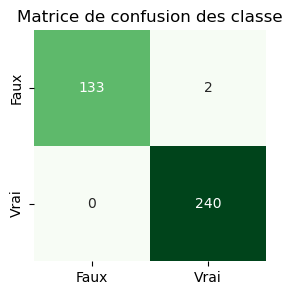

In [37]:
matrix_confusion(y_test, y_pred)

6- Comparer le meilleur modèle de cette phase et le modèle de base </br>

Les performance des deux modèles sont identiques

In [38]:
# 7- Afficher les coefficients du modèle et dire quelles sont les variables les plus importantes dans la prédiction du type de billet
print(lgr_model.best_estimator_["classifier"].coef_)
print("columns: ", list(df.drop(columns=['is_genuine']).columns))

[[ 0.         -0.32122357 -0.74679957 -3.01942655 -1.62349809  4.22445505]]
columns:  ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']


Les variables les plus importantes dans la prédiction du type de billet sont: <b>length, margin_low, margin_up</b>

In [39]:
# 8- Enregistrer votre meilleur modèle pour déploiement en production.
import pickle

# nom du modele
filename = 'best_model.pkl'

# sauvegardons le modele avec pickle
with open(filename, 'wb') as file:
    pickle.dump(lgr_model.best_estimator_, file)

## PARTIE IV :  DEPLOIEMENT DU MODELE FINAL       

Cette partie doit etre livrée dans une fichier script .py comme application à deployer

1- Pour rendre votre modèle accessible à d’autres applications, on peut utiliser:

- Flask API, Fast API, Djongo: Comme Framework pour developpement
    
- Serveur dedié, VPS: pour le deploiement
    
-  AWS, Google Cloud ou Heroku: egalement pour le deploiement

2-	Proposer un déploiement de votre modèle en utilisant le Framework Flask. L’API doit reprendre les informations géométriques d’un billet et retourner un message pour dire si c’est un vrai ou un faux billet avec la probabilité d’être un vrai billet associé. (4pts)

In [40]:
import pickle
from flask import Flask, request, jsonify

# Charger le modèle entraîné
filename = 'best_model.pkl'
with open(filename, 'rb') as f:
    model = pickle.load(f)

app = Flask(__name__)

@app.route('/api/prediction', methods=['POST'])
def prediction():
    # Récupérer les données d'entrée depuis la requête POST
    data = request.get_json()

    # Convertir les données en un tableau NumPy
    # columns:  ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
    billet = [
        data['diagonal'],
        data['height_left'],
        data['height_right'],
        data['margin_low'],
        data['margin_up'],
        data['length']
    ]

    # Effectuer la prédiction sur les données d'entrée
    prediction = model.predict([billet])[0]
    probability = model.predict_proba([billet])[0][1]

    # Préparer la réponse de l'API
    response = {
        'prediction': 'Vrai' if prediction else 'Faux',
        'probability': probability
    }

    # Renvoyer la réponse au format JSON
    return jsonify(response)

if __name__ == '__main__':
    
    app.run(host='localhost', port=5001, debug=True)
    
    

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://localhost:5001
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\Micro_W10\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
